HESTON Model

In [50]:
class HestonModel:
    """
    stockastic volatilty != Black sholes 
    positive volatiliy
    Correlation between vol and prices
    
    """
import numpy as np
import cmath as m

class Heston:
    #init_variables
    def __init__(self, S0, r, q, K, sigma, V0, kappa, lambd, theta, rho, t, T ):
        self.S0 = S0
        self.r = r
        self.q = q
        self.K= K
        self.sigma = sigma
        self.V0 = V0
        
        self.kappa = kappa
        self.lambd = lambd
        self.theta = theta
        self.rho = rho
        
        self.t = t
        self.T = T
        self.tau = T-t
        
        self.bb = 0
        self.a = 0
        self.n = 1

    #begin_utils_functions
    def trapez( self, func,j):       
        if(self.n < 1):
            return
        if(self.n == 1):
            return 0.5 * ( func(j, self.a)+ func(j, self.bb))/(self.bb - self.a)
        else:       
            dx = (self.bb - self.a)/self.n 
            x = np.linspace(self.a, self.bb, self.n)
            F = [ 0 if x[i] == 0 else func(j, x[i]) for i in range(self.n)]     
     
            return 0.5 * dx * sum(F[1:] + F[:-1])
        
  #end_utils_functions       
    def P(self, j):    
        return 0.5 + (1/m.pi) * self.trapez(self.Rec, j)
    
    def price_heson(self, a, bb, n):       
        #init
        self.bb = bb
        self.a = a
        self.n = n
          
        print("P1: ", self.P(1).real)
        print("P2: ", self.P(2).real)
        
        call_price = self.S0 * self.P(1).real - self.K * self.P(2).real * m.exp(-(self.r-self.q) * (self.T-self.t))
        put_price = call_price-(m.exp(m.log(self.S0))-m.exp(m.log(self.K)-self.r*self.tau))
        
        output={
            "Call price":call_price,
            "Put price":put_price    
        }
        print(output)
        
    def Rec(self, j, x ):   
        return self.Xi(j, x) * m.exp(-1j * x * m.log(self.K))/(1j*x)
        
    def Xi(self, j, x):
        return m.exp(self.C(j,x) + self.D(j,x) * self.V0 + 1j * x * self.S0)

    def D(self, j, x):
        return (self.b(j) - self.rho*self.sigma* x +self.d(j,x))*((1-m.exp(self.d(j,x)*self.tau))/(1-self.g(j,x)*m.exp(self.d(j,x)*self.tau)))/(self.sigma**2) 
    
    def C(self, j, x):
       return (self.r - self.q) * x * 1j *self.tau + (self.kappa * self.theta/(self.sigma ** 2))*(self.b(j) - self.rho*self.sigma* x *1j - 2 * m.log((1-self.g(j,x)*m.exp(self.d(j,x)*self.tau))/(1-self.g(j,x))))
    
    def b(self, j):
        if(j == 1):
            return self.kappa + self.lambd - self.rho * self.sigma
        if(j == 2):
            return self.kappa + self.lambd
             
    def g(self, j, x):
        return (self.b(j) - self.rho * self.sigma * x * 1j + self.d(j,x)) /(self.b(j) - self.rho * self.sigma * x * 1j - self.d(j,x))

    def d(self, j, x):
        return m.sqrt((self.rho * self.sigma * x *1j - self.b(j))**2 - (self.sigma**2)*(2*self.u(j)* x*1j- x**2))
                    
    def u(slef, j):
        return 0.5 if j == 1 else -0.5 
    
heston_model = Heston(S0 = 100, r = 0.05, q = 0.03, K = 80, sigma = 0.5, V0 = 0.1, theta = 0.10, kappa = 5, rho = -0.7, lambd = 0.5, t = 0, T = 1)

heston_model.price_heson(0.00001,100,10000)



P1:  0.5000041440499158
P2:  0.5000083451008478
{'Call price': (10.791813084179005+0j), 'Put price': (-13.109832955763942+0j)}


The prices of European options and the underlying P1 and P2 are presented below:

{'Call price': 14.279695297083634, 'Put price': 9.402637747155055, 'P1': 0.6560049653094503, 'P2': 0.5395207498001746}


The price is based on the following parameters:

{'x0': 4.605170185988092, 'ln_k': 4.605170185988092, 'r': 0.05, 'v0': 0.1, 'kappa': 5.0, 'theta': 0.1, 'lamda': 0.5, 'sigma': 0.5, 'rho': -0.7, 'tau': 1.0, 'a': 0.5, 'u': [0.5, -0.5], 'b': [5.85, 5.5]}


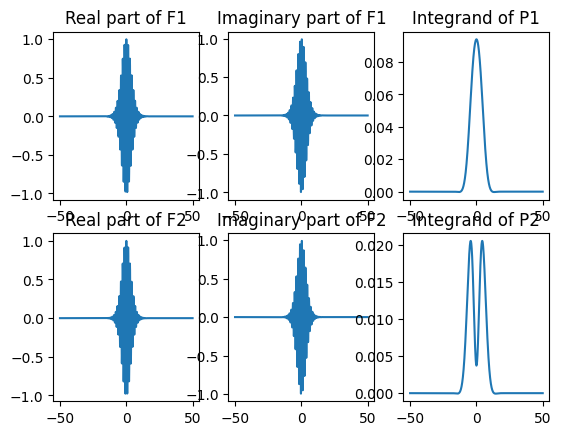

In [12]:


#Import libraries

import numpy as np
import math as math
import cmath as cmath
import matplotlib.pyplot as plt



#Class to hold the relevant functions

class Heston(object):
    
    def __init__(self,S0,K,tau,r,kappa,theta,v0,lamda,sigma,rho): #Constructor for initiating the class
        
        self.x0=math.log(S0);
        self.ln_k=math.log(K);
        self.r=r;
        self.v0=v0;
        self.kappa=kappa;
        self.theta=theta;
        self.lamda=lamda;
        self.sigma=sigma;
        self.rho=rho;
        self.tau=tau;
   
        self.a=kappa*theta;
        self.u=[0.5,-0.5];
        self.b=[kappa+lamda-rho*sigma,kappa+lamda];
        
    def reset_parameters(self,S0,K,tau,r,kappa,theta,v0,lamda,sigma,rho): # Function for resetting the constant parameters
        self.x0=math.log(S0);
        self.ln_k=math.log(K);
        self.r=r;
        self.v0=v0;
        self.kappa=kappa;
        self.theta=theta;
        self.lamda=lamda;
        self.sigma=sigma;
        self.rho=rho;
        self.tau=tau;
   
        self.a=kappa*theta;
        self.u=[0.5,-0.5];
        self.b=[kappa+lamda-rho*sigma,kappa+lamda];       
       
    
    def characteristic_func(self,phi):#Return the characteristic functions f1 and f2, each of which has a real and a complex part
        
        d=[0.0,0.0];g=[0.0,0.0];C=[0.0,0.0];D=[0.0,0.0];edt=[0.0,0.0];gedt=[0.0,0.0]; f=[0.0,0.0];

        for j in range(2):

            temp=self.b[j]-1j*self.rho*self.sigma*phi;

            d[j]=cmath.sqrt(temp**2-self.sigma**2*(2.0*self.u[j]*phi*1j-phi**2));

            g[j]=(temp+d[j])/(temp-d[j]);

            edt[j]=cmath.exp(d[j]*self.tau);
            gedt[j]=1.0-g[j]*edt[j];

            D[j]=(temp+d[j])*(1.0-edt[j])/gedt[j]/self.sigma/self.sigma;
            C[j]=self.r*phi*self.tau*1j+self.a/self.sigma/self.sigma*((temp+d[j])*self.tau-2.0*cmath.log(gedt[j]/(1.0-g[j])));
            f[j]=cmath.exp(C[j]+D[j]*self.v0+1j*phi*self.x0);     
            
        return f;    
 
    def f1(self,phi):#f1 only using a copy of the previous code with minimal change, i.e.,j=0 replaes loop
        
        d=[0.0,0.0];g=[0.0,0.0];C=[0.0,0.0];D=[0.0,0.0];edt=[0.0,0.0];gedt=[0.0,0.0]; f=[0.0,0.0];

        j=0;

        temp=self.b[j]-1j*self.rho*self.sigma*phi;

        d[j]=cmath.sqrt(temp**2-self.sigma**2*(2.0*self.u[j]*phi*1j-phi**2));
        g[j]=(temp+d[j])/(temp-d[j]);

        edt[j]=cmath.exp(d[j]*self.tau);
        gedt[j]=1.0-g[j]*edt[j];

        D[j]=(temp+d[j])*(1.0-edt[j])/gedt[j]/self.sigma/self.sigma;
        C[j]=self.r*phi*self.tau*1j+self.a/self.sigma/self.sigma*((temp+d[j])*self.tau-2.0*cmath.log(gedt[j]/(1.0-g[j])));
        f[j]=cmath.exp(C[j]+D[j]*self.v0+1j*phi*self.x0);

        return f[0];    
    
    def f2(self,phi):# f2 only using a copy of the previous code with minimal change, i.e.,now j=1 replaes loop
        
        d=[0.0,0.0];g=[0.0,0.0];C=[0.0,0.0];D=[0.0,0.0];edt=[0.0,0.0];gedt=[0.0,0.0]; f=[0.0,0.0];

        j=1;

        temp=self.b[j]-1j*self.rho*self.sigma*phi;

        d[j]=cmath.sqrt(temp**2-self.sigma**2*(2.0*self.u[j]*phi*1j-phi**2));
        g[j]=(temp+d[j])/(temp-d[j]);

        edt[j]=cmath.exp(d[j]*self.tau);
        gedt[j]=1.0-g[j]*edt[j];

        D[j]=(temp+d[j])*(1.0-edt[j])/gedt[j]/self.sigma/self.sigma;
        C[j]=self.r*phi*self.tau*1j+self.a/self.sigma/self.sigma*((temp+d[j])*self.tau-2.0*cmath.log(gedt[j]/(1.0-g[j])));
        f[j]=cmath.exp(C[j]+D[j]*self.v0+1j*phi*self.x0);
        
        return f[1];     
      
    def P1_integrand(self,phi): #Returns the integrand  that appears in the P1 formula
        temp=cmath.exp(-1j*phi*self.ln_k)*self.f1(phi)/1j/phi;
        return temp.real;

    def P2_integrand(self,phi):  #Returns the integrand  that appears in the P1 formula
        temp=cmath.exp(-1j*phi*self.ln_k)*self.f2(phi)/1j/phi;
        return temp.real;
    
    def Probabilities(self,a,b,n):  #Compute the two probabilities: a and b are the integration limits, n is the number of intervals
                                    # usually the interval >0 to 100 captures the range that matters, so no need to go to b=infinity!
        pi_i=1.0/math.pi;
        P1=0.5+pi_i*trapzd(self.P1_integrand,a,b,n); #trapzd function is de
        P2=0.5+pi_i*trapzd(self.P2_integrand,a,b,n);
        P=[P1,P2];
        return P;
    
    def price(self,a,b,n):
        Ps=self.Probabilities(a,b,n);
        
        call_price=math.exp(self.x0)*Ps[0]-math.exp(self.ln_k-self.r*self.tau)*Ps[1];
        put_price=call_price-(math.exp(self.x0)-math.exp(self.ln_k-self.r*self.tau));
        
        output={
            "Call price":call_price,
            "Put price":put_price,
            "P1":Ps[0],
            "P2":Ps[1]
        }
        return output;
    
    def plot_f1f2(self): # Plot real parts of the characteristic functions (f1 and f2), 
                         # and the integrands that appear in P1 and P2
        
        n=2000;
        lwr=-50.111;
        upr=50.0311;
        
        x=np.linspace(lwr,upr,n+1);
        fs=[self.characteristic_func(x[i]) for i in range(n+1)];
        
        y1=[fs[i][0].real for i in range(n+1)];
        y2=[fs[i][0].imag for i in range(n+1)];
        y3=[self.P1_integrand(x[i]) for i in range(n+1)];
        y4=[fs[i][1].real for i in range(n+1)]; 
        y5=[fs[i][1].imag for i in range(n+1)];
        y6=[self.P2_integrand(x[i]) for i in range(n+1)];    
        
        fig=plt.figure();
        f1_real=fig.add_subplot(231);
        f1_real.set_title('Real part of F1');
        f1_real.plot(x,y1);
        
        f1_imag=fig.add_subplot(232);
        f1_imag.set_title('Imaginary part of F1');
        f1_imag.plot(x,y2);        
        
        f1_integrand=fig.add_subplot(233);
        f1_integrand.set_title('Integrand of P1');
        f1_integrand.plot(x,y3);      
   
        f2_real=fig.add_subplot(234);
        f2_real.set_title('Real part of F2');
        f2_real.plot(x,y4);
        
        f2_imag=fig.add_subplot(235);
        f2_imag.set_title('Imaginary part of F2');
        f2_imag.plot(x,y5);
        
        f2_integrand=fig.add_subplot(236);
        f2_integrand.set_title('Integrand of P2');
        f2_integrand.plot(x,y6); 
        
        plt.show();
  
  #end class
  
        
def trapzd(func,a,b,n): #Trapzoid method for numerical integration, one can also use a function from scipy.integrate library
        
    if (n<1):
        return ;
    elif (n==1):
        return 0.5*(b-a)*(func(a)+func(b));
    else:
            
        temp=0.0;
        dx=(b-a)/n;
            
        x=np.linspace(a,b,n+1);
        y=[func(x[i]) for i in range(n+1)];
            
        temp=0.5*dx*np.sum(y[1:]+ y[:-1]);
        return temp;
        
        
#Usage Example
hc=Heston(S0=100,K=100,tau=1.0,r=0.05,kappa=5.0,theta=0.1,v0=0.1,lamda=0.5,sigma=0.5,rho=-0.7);

price=hc.price(0.00001,100,10000);

print("The prices of European options and the underlying P1 and P2 are presented below:\n")
print(price)

print("\n\nThe price is based on the following parameters:\n")
print(vars(hc))
hc.plot_f1f2()

    